<a href="https://colab.research.google.com/github/pooriaazami/deep_learning_class_notebooks/blob/main/14_Vanilla_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

inspired by: https://github.com/safwankdb/Vanilla-GAN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torchvision.transforms as T
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [33]:
BATCH_SIZE = 128
IMAGE_SIZE = (28, 28)
NOISE_DIM = 64
LR = 2e-4

EPOCHS = 50

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transforms = T.Compose([
    T.ToTensor(),
    T.Normalize((.5), (.5))
])

train_dataset = MNIST(root='./data', download=True, train=True, transform=transforms)
test_dataset = MNIST(root='./data', download=True, train=False, transform=transforms)

dataset = ConcatDataset([train_dataset, test_dataset])

100%|██████████| 9912422/9912422 [00:00<00:00, 104515156.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 101199410.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29330723.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1214105.46it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [25]:
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
class Generator(nn.Module):
  def __init__(self, noise_dim, target_size):
    super().__init__()
    self.target_size = target_size

    output_size = 1
    for x in target_size:
      output_size *= x

    self.layers = nn.Sequential(
        nn.Linear(noise_dim, 256),
        nn.LeakyReLU(.2),
        nn.Linear(256, 512),
        nn.LeakyReLU(.2),
        nn.Linear(512, 1024),
        nn.LeakyReLU(.2),
        nn.Linear(1024, output_size),
        nn.Tanh()
    )

  def forward(self, x):
    x = self.layers(x)
    x = x.view(-1, *self.target_size) # (28, 28) ==> (1, (28, 28))

    return x

In [6]:
class Discriminator(nn.Module):
  def __init__(self, input_shape):
    super().__init__()

    self.input_size = 1
    for x in input_shape:
      self.input_size *= x

    self.layers = nn.Sequential(
        nn.Linear(self.input_size, 1024),
        nn.LeakyReLU(.2),
        nn.Dropout(.3),
        nn.Linear(1024, 512),
        nn.LeakyReLU(.2),
        nn.Dropout(.3),
        nn.Linear(512, 256),
        nn.LeakyReLU(.2),
        nn.Dropout(.3),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = x.view(-1, self.input_size)
    x = self.layers(x)

    return x

In [28]:
generator = Generator(NOISE_DIM, IMAGE_SIZE).to(DEVICE)
discriminator = Discriminator(IMAGE_SIZE).to(DEVICE)

In [7]:
def sample_and_plot():
  with torch.no_grad():
    noise = torch.randn(16, NOISE_DIM).to(DEVICE)
    generated_output = generator(noise).unsqueeze(1)
    img = make_grid(generated_output, nrow=4).cpu().numpy().transpose((1, 2, 0))

    plt.imshow(img, cmap='gray')
    plt.show()

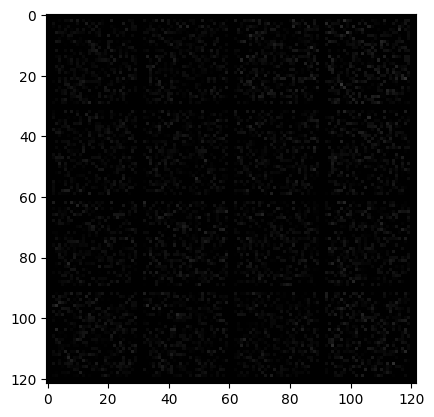

In [9]:
sample_and_plot()

In [29]:
generator_optimizer = optim.Adam(generator.parameters(), lr=LR)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=LR)

In [30]:
criterion = nn.BCELoss()

In [31]:
generator_log = []
discriminator_log = []

Epoch 1 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 2 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 3 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 4 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 5 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

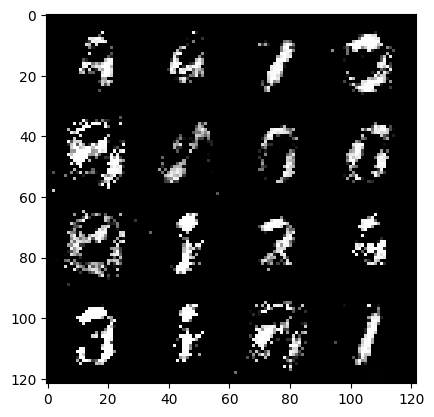

Epoch 6 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 7 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 8 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 9 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 10 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

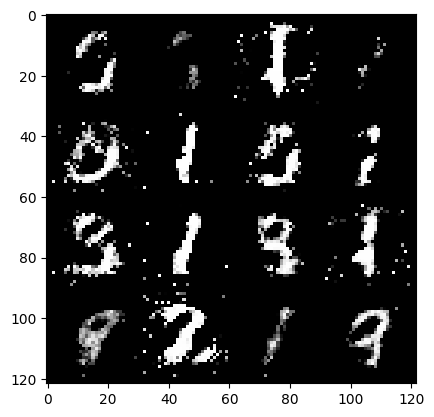

Epoch 11 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 12 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 13 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 14 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 15 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

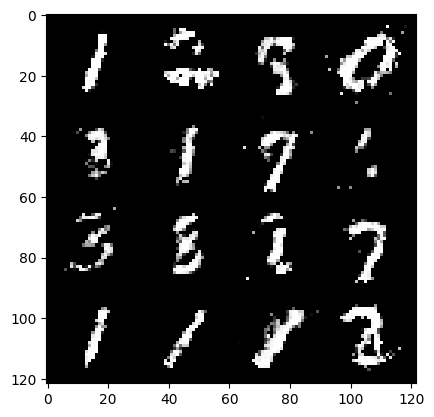

Epoch 16 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 17 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 18 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 19 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 20 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

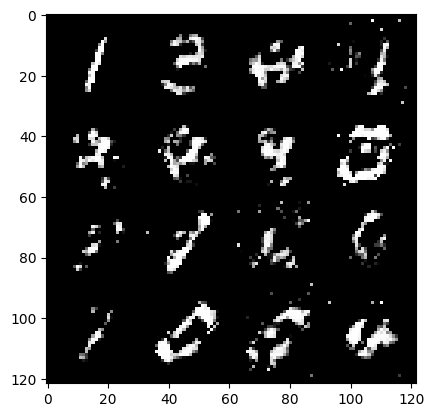

Epoch 21 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 22 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 23 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 24 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 25 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

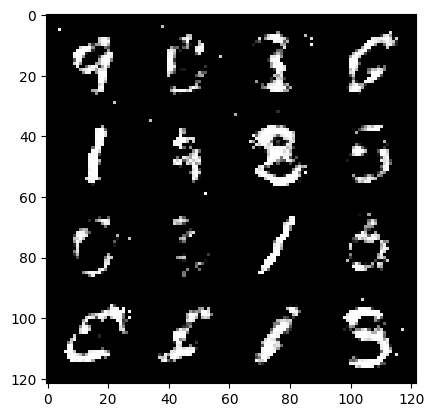

Epoch 26 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 27 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 28 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 29 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 30 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

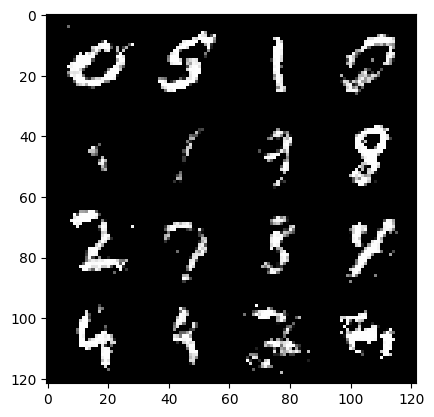

Epoch 31 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 32 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 33 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 34 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 35 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

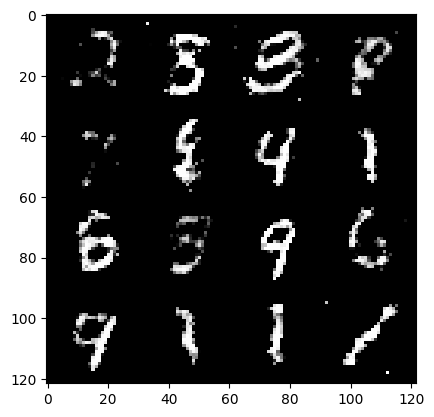

Epoch 36 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 37 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 38 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 39 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 40 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

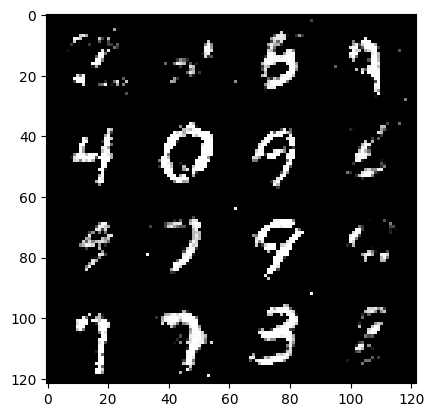

Epoch 41 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 42 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 43 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 44 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 45 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

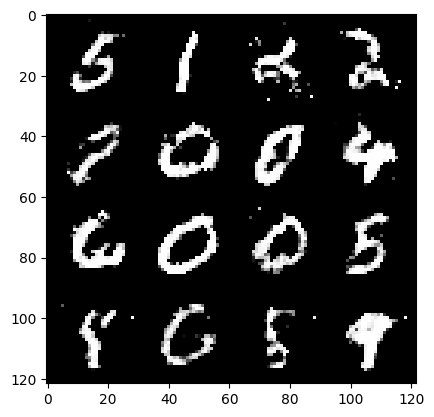

Epoch 46 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 47 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 48 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 49 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

Epoch 50 / 50


  0%|          | 0/547 [00:00<?, ?it/s]

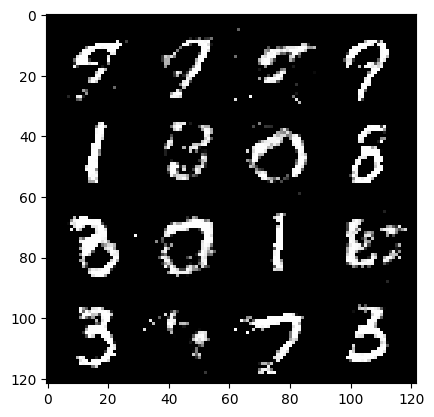

In [34]:
for i in range(1, EPOCHS + 1):
  print(f'Epoch {i} / {EPOCHS}')

  total_discriminator_loss = .0
  total_generator_loss = .0
  for real_images, _ in tqdm(dataloader):
    real_images = real_images.to(DEVICE)
    real_images = real_images.squeeze()
    batch_size = real_images.size()[0]

    # Discriminator
    discriminator_optimizer.zero_grad()

    noise = torch.randn(batch_size, NOISE_DIM).to(DEVICE)
    generated_images = generator(noise)
    gen_predictions = discriminator(generated_images)
    gen_loss = criterion(gen_predictions, torch.zeros_like(gen_predictions))
    gen_loss.backward()

    real_predictions = discriminator(real_images)
    real_loss = criterion(real_predictions, torch.ones_like(real_predictions))
    real_loss.backward()

    discriminator_optimizer.step()

    total_discriminator_loss += gen_loss.detach().cpu().numpy() + \
                                real_loss.detach().cpu().numpy()

    # Generator
    generator_optimizer.zero_grad()

    noise = torch.randn(batch_size, NOISE_DIM).to(DEVICE)
    generated_images = generator(noise)
    gen_predictions = discriminator(generated_images)
    loss = criterion(gen_predictions, torch.ones_like(gen_predictions))
    loss.backward()

    generator_optimizer.step()

    total_generator_loss += loss.detach().cpu().numpy()

  discriminator_log.append(total_discriminator_loss)
  generator_log.append(total_generator_loss)

  if i % 5 == 0:
    sample_and_plot()


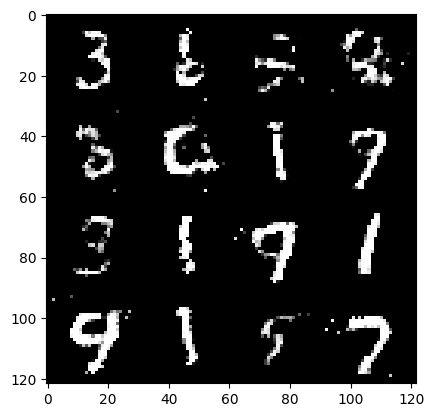

In [35]:
sample_and_plot()

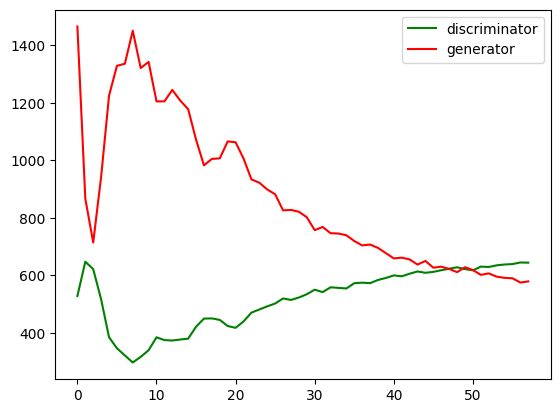

In [36]:
plt.plot(discriminator_log, color='green', label='discriminator')
plt.plot(generator_log, color='red', label='generator')

plt.legend()
plt.show()